<a href="https://colab.research.google.com/github/maneeshwar22/Internship-aiml/blob/main/Internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving diamonds.csv to diamonds.csv


In [7]:
import pandas as pd

df = pd.read_csv('diamonds.csv')  # Use the exact filename
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


✅ Dataset Loaded
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null

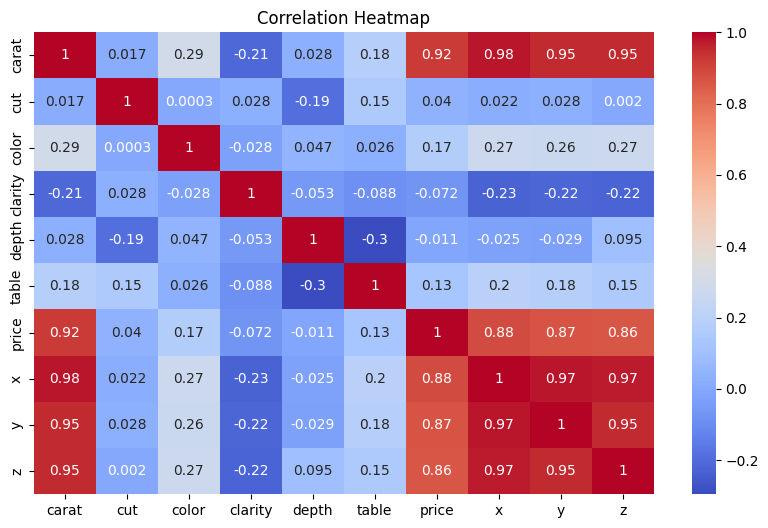

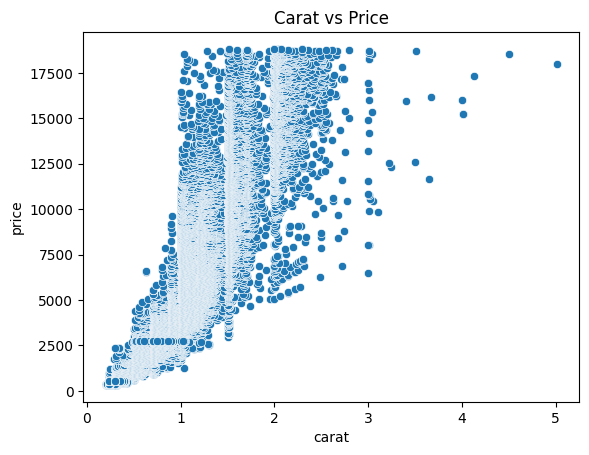

📉 Mean Squared Error: 294819.12
📈 R² Score: 0.9815


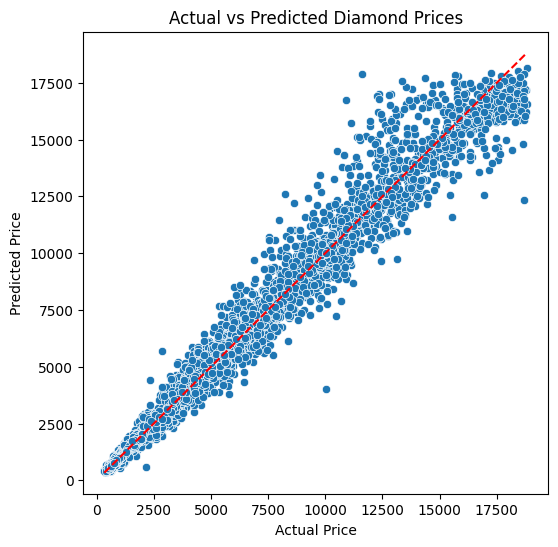

In [12]:
# 📌 Step 1: Upload CSV file
from google.colab import files


# 📌 Step 2: Load the dataset
import pandas as pd


try:
    df = pd.read_csv('diamonds.csv')
    print("✅ Dataset Loaded")
    print(df.head())
except FileNotFoundError:
    print("Error: 'diamonds.csv' not found. Please make sure the file is uploaded or the path is correct.")
    # You might want to stop execution or handle this error appropriately
    exit() # Exit if file not found


# 📌 Step 3: Explore the data
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nStatistical Summary:")
print(df.describe())

# 📌 Step 4: Encode categorical columns
from sklearn.preprocessing import LabelEncoder

# Corrected categorical column names based on df.head() output
categorical_cols = ['cut', 'color', 'clarity']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("✅ Label encoding done")

# 📌 Step 5: Visualize relationships
import seaborn as sns
import matplotlib.pyplot as plt

# Remove the 'Unnamed: 0' column as it's likely an index column
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# Correlation Heatmap - Calculate correlation after encoding
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Carat vs Price Scatterplot
sns.scatterplot(data=df, x='carat', y='price')
plt.title("Carat vs Price")
plt.show()

# 📌 Step 6: Split dataset into training and testing
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 Step 7: Train the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

# 📌 Step 8: Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📉 Mean Squared Error:", round(mse, 2))
print("📈 R² Score:", round(r2, 4))

# 📌 Step 9: Plot actual vs predicted values
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.show()